In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [1]:
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []

In [2]:
# Needed if importing the terminology from a CSV file.
import csv

In [3]:
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open('ilang_UN_GWHT_terminology_raw - Sheet1.csv') as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [4]:
# Show raw_definitions content and size.

In [30]:
print(raw_definitions)
len(raw_definitions)

[{'definiendum': 'Definiendum', 'short definiendum': 'Short Definiendum', 'definiens': 'Definiens'}, {'definiendum': 'Action Plan for the Future', 'short definiendum': 'Action Plan', 'definiens': 'The Action Plan for the Future (Cultural Landscapes)\n        was prepared by the UNESCO "Expert Meeting on\n        Cultural Landscapes of Outstanding Universal Value" held in\n        Templin, Germany in October 1993 (see von Droste et al\n        1995: Annex 1).  The Action Plan outlines\n        recommendations concerning the provision of "Guidance to\n        States Parties on the Identification, Assessment, Nomination\n        and Management of Cultural Landscapes for Inclusion in the\n        World Heritage List" and on the preparation of a "Thematic\n        Study on Cultural Landscapes".  The Action Plan was\n        adopted by the World Heritage Committee at its\n        seventeenth session in 1993 (UNESCO 4 February 1994:\n        55-56 and Annex VII).\n\nsee Cultural landscapes'},

160

In [ ]:
# Define a function needed to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.

In [6]:
import unicodedata
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

In [7]:
# Create an empry term dependencies network, to hold dependencies of definitions on terms.

In [8]:
term_dependency_network = []

In [9]:
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})
            print(j['definiendum'], '--depends on->', i['definiendum'])

# Show term_dependency_network size.
len(term_dependency_network)

Action Plan for the Future --depends on-> Action Plan for the Future
Corrective measures --depends on-> Action Plan for the Future
Advisory bodies --depends on-> Advisory bodies
Reactive monitoring --depends on-> Advisory bodies
State of conservation --depends on-> Advisory bodies
Assistance --depends on-> Assistance
Balance --depends on-> Assistance
Convention concerning the protection of the world cultural and natural heritage --depends on-> Assistance
Emergency assistance --depends on-> Assistance
International assistance --depends on-> Assistance
International protection --depends on-> Assistance
List of World Heritage in Danger --depends on-> Assistance
Operational Guidelines for the Implementation of the World Heritage Convention --depends on-> Assistance
Preparatory assistance --depends on-> Assistance
Promotional activities --depends on-> Assistance
Technical co-operation --depends on-> Assistance
Training --depends on-> Assistance
World Heritage Committee --depends on-> Assist

Inventory of property --depends on-> Indicative list
Authenticity --depends on-> Information sources
Information sources --depends on-> Information sources
Groups of urban buildings --depends on-> Inhabited historic towns
Inhabited historic towns --depends on-> Inhabited historic towns
Cultural heritage --depends on-> Inscription
Deferred --depends on-> Inscription
International Council of Monuments and Sites --depends on-> Inscription
Inscription --depends on-> Inscription
Tentative list --depends on-> Inscription
Corrective measures --depends on-> Integrity
Criteria --depends on-> Integrity
Cultural heritage criteria --depends on-> Integrity
Evaluation --depends on-> Integrity
Integrity --depends on-> Integrity
IUCN - The World Conservation Union --depends on-> Integrity
Management plan --depends on-> Integrity
Natural heritage criteria --depends on-> Integrity
Natural property --depends on-> Integrity
Tentative list --depends on-> Integrity
Assistance --depends on-> International as

Mixed property --depends on-> Operational Guidelines
Mixed site --depends on-> Operational Guidelines
Movable property --depends on-> Operational Guidelines
Operational Guidelines --depends on-> Operational Guidelines
Operational Guidelines for the Implementation of the World Heritage Convention --depends on-> Operational Guidelines
Organically evolved landscape --depends on-> Operational Guidelines
Preparatory assistance --depends on-> Operational Guidelines
Presentation --depends on-> Operational Guidelines
Preservation --depends on-> Operational Guidelines
Protection --depends on-> Operational Guidelines
Reactive monitoring --depends on-> Operational Guidelines
Renomination --depends on-> Operational Guidelines
Serial property --depends on-> Operational Guidelines
Sites --depends on-> Operational Guidelines
Systematic monitoring and reporting --depends on-> Operational Guidelines
Technical co-operation --depends on-> Operational Guidelines
Tentative list --depends on-> Operational G

Criteria --depends on-> World Heritage
Cultural heritage criteria --depends on-> World Heritage
Cultural landscapes --depends on-> World Heritage
Cultural property --depends on-> World Heritage
Deferred --depends on-> World Heritage
Deletion --depends on-> World Heritage
Delisting --depends on-> World Heritage
Emblem --depends on-> World Heritage
Emergency assistance --depends on-> World Heritage
Evaluation --depends on-> World Heritage
Fund --depends on-> World Heritage
Fund for the Protection of the World Cultural and Natural Heritage --depends on-> World Heritage
Global Strategy --depends on-> World Heritage
Groups of urban buildings --depends on-> World Heritage
Harmonization --depends on-> World Heritage
International Centre for the Study of the Preservation and Restoration of Cultural Property (Rome Centre --depends on-> World Heritage
International Council of Monuments and Sites --depends on-> World Heritage
ICOMOS evaluation --depends on-> World Heritage
Identification --depend

1424

In [ ]:
print(term_dependency_network)

In [10]:
# Create an empty networkx graph to hold the term dependency network
import networkx as nx
tdn_graph = nx.DiGraph()

In [11]:
# Add to tdn_graph a directed edge for each term dependency in term_dependency_network.
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')

In [ ]:
# Show edges and nodes of tdn_graph.
print(tdn_graph.edges)
print(tdn_graph.nodes)

In [ ]:
# Draw tdn_graph, save it as a PNG file; consider changing figsize and dpi - smaller is fine for smallish graphs, bigger is necessary for larger graphs; also note that changing PNG to PDF yields substantially smaller file size.
figure(num=None, figsize=(20, 20), dpi=150, facecolor='w', edgecolor='g')
pos = nx.kamada_kawai_layout(tdn_graph)
nx.draw(tdn_graph, pos, arrows=True, with_labels=True, node_color='#2E8B57', edge_color='#FFA500')
plt.savefig("tdn_graph.png")

In [12]:
# Create an edgelist file, to be used in Gephi for interactive visualization.
nx.write_edgelist(tdn_graph, "test_edgelist.txt", delimiter = '%')

In [13]:
# Show node and edge count for tdn_graph.
print(len(tdn_graph.nodes))
print(len(tdn_graph.edges))

157
1423


In [14]:
from tabulate import tabulate

In [15]:
# Analyze terms by importance (number of times they are mentioned in definitions)
# Compute and show in degrees (number of incoming edges) count for all nodes.
in_degrees = tdn_graph.in_degree()
tdn_in_degrees = []
for i in in_degrees:
    tdn_in_degrees.append(i)

# Sort tdn_in_degrees from lowest to highest.
import operator
tdn_in_degrees.sort(key = operator.itemgetter(1))

# Print tdn_in_degrees as a table, which markdown will properly render (tablefmt parameter).
from tabulate import tabulate
print(tabulate(tdn_in_degrees, headers = ['Term', 'Dependencies'], tablefmt="pipe"))

| Term                                                                                                     |   Dependencies |
|:---------------------------------------------------------------------------------------------------------|---------------:|
| Convention concerning the protection of the world cultural and natural heritage                          |              0 |
| Operational Guidelines for the Implementation of the World Heritage Convention                           |              0 |
| Nara Conference on Authenticity in Relation to the World Heritage Convention                             |              0 |
| Referral                                                                                                 |              0 |
| United Nations Educational, Scientific and Cultural Organization                                         |              0 |
| Young People's Participation in World Heritage Preservation and Promotion                                |          

In [ ]:
# Plot tdn_in_degrees as scatterplot.
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(*zip(*tdn_in_degrees))
plt.xticks(rotation=90)
plt.show()

In [16]:
# Analyze term sensitivity to change
# Compute and show out degrees (number of exiting edges) count for all nodes.
out_degrees = tdn_graph.out_degree()
tdn_out_degrees = []
for i in out_degrees:
    tdn_out_degrees.append(i)

# Sort tdn_out_degrees from lowest to highest.
import operator
tdn_out_degrees.sort(key = operator.itemgetter(1))

# Print tdn_out_degrees as a table, which markdown will properly render (tablefmt parameter).
from tabulate import tabulate
print(tabulate(tdn_out_degrees, headers = ['Term', 'Depends on'], tablefmt="pipe"))

| Term                                                                                                     |   Depends on |
|:---------------------------------------------------------------------------------------------------------|-------------:|
| UNESCO                                                                                                   |            0 |
| Conditions of authenticity                                                                               |            1 |
| Nara Conference on Authenticity in Relation to the World Heritage Convention                             |            1 |
| Nara Document on Authenticity                                                                            |            1 |
| Test of authenticity                                                                                     |            1 |
| Designed landscape                                                                                       |            1 |
| Criter

In [ ]:
# Plot tdn_out_degrees as scatterplot.
figure(num=None, figsize=(40, 20), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(*zip(*tdn_out_degrees))
plt.xticks(rotation=90)
plt.show()

| Term                                                                            | Uses                        |
|:--------------------------------------------------------------------------------|:----------------------------|
| Action Plan for the Future                                                      | Outstanding universal value |
| Outstanding universal value                                                     | Outstanding universal value |
| Convention concerning the protection of the world cultural and natural heritage | Outstanding universal value |
| World Heritage Committee                                                        | Outstanding universal value |
| Cultural landscapes                                                             | Outstanding universal value |
| Global Strategy                                                                 | Outstanding universal value |
| Tentative list                                                                  | Outs

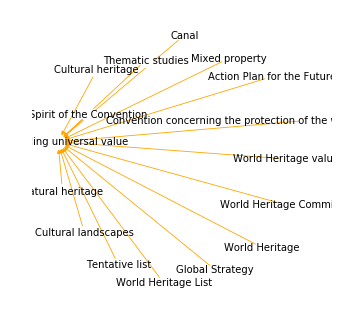

In [22]:
# Make a Single Term Importance Net (STIN), which includes a term X and all those that depend on X in a term dependency network.
single_term = 'Outstanding universal value'
stin = nx.DiGraph()
for i in tdn_graph.edges():
    if single_term == i[1]:
        stin.add_edge(i[0], i[1])

# Display STIN as markdown-compatible table
from tabulate import tabulate
stin_rows = []
for i in stin.edges():
    stin_rows.append((i[0], i[1]))
type(stin_rows)
print(tabulate(stin_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))
print(len(stin_rows))

# Draw STIN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(stin, k=20)
nx.draw(stin, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
plt.savefig("stin.png")

| Term                        | Uses                        |
|:----------------------------|:----------------------------|
| Outstanding universal value | Bureau                      |
| Outstanding universal value | Committee                   |
| Outstanding universal value | Convention                  |
| Outstanding universal value | Criteria                    |
| Outstanding universal value | Evaluation                  |
| Outstanding universal value | Guidelines                  |
| Outstanding universal value | List                        |
| Outstanding universal value | Natural                     |
| Outstanding universal value | Natural heritage            |
| Outstanding universal value | Nomination                  |
| Outstanding universal value | Outstanding universal value |
| Outstanding universal value | Protection                  |
| Outstanding universal value | Sites                       |
| Outstanding universal value | UNESCO                      |
| Outsta

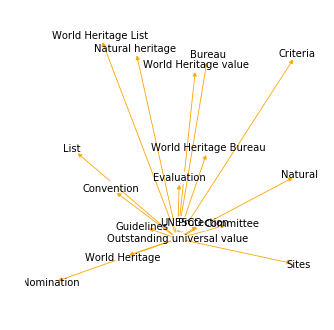

In [23]:
# Make a Single Term Sensitivity Net (STSN), which includes a term X and all those on which X depends in a term dependency network.
single_term = 'Outstanding universal value'
stsn = nx.DiGraph()
for i in tdn_graph.edges():
    if single_term == i[0]:
        stsn.add_edge(i[0], i[1])

# Display STSN as markdown-compatible table
from tabulate import tabulate
stsn_rows = []
for i in stsn.edges():
    stsn_rows.append((i[0], i[1]))
type(stsn_rows)
print(tabulate(stsn_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))
print(len(stsn_rows))

# Draw STSN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.random_layout(stsn)
nx.draw(stsn, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
plt.savefig("stsn.png")

In [29]:
# CAREFUL!
# Enumerate all cycles in the term dependency network.
list(nx.simple_cycles(tdn_graph))

KeyboardInterrupt: 

In [ ]:
# CAREFUL!
# Enumerate all strongly connected components in the term dependency network.
list(nx.strongly_connected_components(tdn_graph))

In [36]:
# count words in all definitions
type(term_dependency_network)

list

In [48]:
for i in raw_definitions:
    i['definiens']

Definiens
The Action Plan for the Future (Cultural Landscapes)
        was prepared by the UNESCO "Expert Meeting on
        Cultural Landscapes of Outstanding Universal Value" held in
        Templin, Germany in October 1993 (see von Droste et al
        1995: Annex 1).  The Action Plan outlines
        recommendations concerning the provision of "Guidance to
        States Parties on the Identification, Assessment, Nomination
        and Management of Cultural Landscapes for Inclusion in the
        World Heritage List" and on the preparation of a "Thematic
        Study on Cultural Landscapes".  The Action Plan was
        adopted by the World Heritage Committee at its
        seventeenth session in 1993 (UNESCO 4 February 1994:
        55-56 and Annex VII).

see Cultural landscapes
Article 8(3) of the World Heritage Convention
        establishes the International Centre for the Study of
        the Preservation and Restoration of Cultural Property (Rome
        Centre), now known 

In [83]:
wordcount = {}
for i in raw_definitions:
    for word in i['definiens'].lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        word = word.replace("(","")
        word = word.replace(")","")
        word = word.replace("/","")
        word = word.replace("-","")
#         if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [84]:
len(wordcount)

1616

In [85]:
print(wordcount)

{'definiens': 1, 'the': 1112, 'action': 7, 'plan': 4, 'for': 153, 'future': 10, 'cultural': 144, 'landscapes': 32, 'was': 22, 'prepared': 5, 'by': 77, 'unesco': 193, 'expert': 15, 'meeting': 16, 'on': 79, 'of': 727, 'outstanding': 32, 'universal': 31, 'value': 32, 'held': 16, 'in': 352, 'templin': 1, 'germany': 2, 'october': 3, '1993': 4, 'see': 126, 'von': 10, 'droste': 10, 'et': 10, 'al': 11, '1995': 28, 'annex': 7, '1': 23, 'outlines': 3, 'recommendations': 2, 'concerning': 19, 'provision': 5, 'guidance': 8, 'to': 292, 'states': 58, 'parties': 41, 'identification': 21, 'assessment': 2, 'nomination': 25, 'and': 395, 'management': 16, 'inclusion': 43, 'world': 278, 'heritage': 348, 'list': 126, 'preparation': 5, 'a': 143, 'thematic': 5, 'study': 4, 'adopted': 14, 'committee': 73, 'at': 37, 'its': 44, 'seventeenth': 2, 'session': 12, '4': 8, 'february': 110, '1994': 13, '5556': 2, 'vii': 1, 'article': 44, '83': 3, 'convention': 112, 'establishes': 8, 'international': 48, 'centre': 25, 

In [94]:
sortable_wordcount = []
for i in wordcount.items():
    sortable_wordcount.append(i)

In [95]:
type(sortable_wordcount)

list

In [96]:
sortable_wordcount.sort(key = operator.itemgetter(1))

In [97]:
print(sortable_wordcount)

[('definiens', 1), ('templin', 1), ('vii', 1), ('rôles', 1), ('49', 1), ('50', 1), ('84', 1), ('final', 1), ('justifiable', 1), ('virtue', 1), ('powerful', 1), ('artistic', 1), ('associations', 1), ('element', 1), ('rather', 1), ('insignificant', 1), ('absentunesco', 1), ('tongariro', 1), ('zealand', 1), ('ulurukata', 1), ('tjuta', 1), ('respectively', 1), ('52', 1), ('asiapacific', 1), ('design', 1), ('workmanship', 1), ('setting', 1), ('distinctive', 1), ('reconstruction', 1), ('acceptable', 1), ('detailed', 1), ('conjecture', 1), ('heading', 1), ('undefined', 1), ('acknowledged', 1), ('vague', 1), ('japan', 1), ('preliminary', 1), ('resulted', 1), ('adoption', 1), ('declaration', 1), ('texas', 1), ('usa', 1), ('cosponsored', 1), ('usicomos', 1), ('getty', 1), ('cosnervation', 1), ('institute', 1), ('agrees', 1), ('allow', 1), ('photographic', 1), ('materials', 1), ('6iii', 1), ('reasonable', 1), ('statement', 1), ('reaffirmed', 1), ('conformity', 1), ('maintained', 1), ('funds', 1),

In [98]:
sortable_wordcount[2]

('vii', 1)

In [99]:
# Print as a table, which markdown will properly render (tablefmt parameter).
print(tabulate(sortable_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word                     |   Count |
|:-------------------------|--------:|
| definiens                |       1 |
| templin                  |       1 |
| vii                      |       1 |
| rôles                    |       1 |
| 49                       |       1 |
| 50                       |       1 |
| 84                       |       1 |
| final                    |       1 |
| justifiable              |       1 |
| virtue                   |       1 |
| powerful                 |       1 |
| artistic                 |       1 |
| associations             |       1 |
| element                  |       1 |
| rather                   |       1 |
| insignificant            |       1 |
| absentunesco             |       1 |
| tongariro                |       1 |
| zealand                  |       1 |
| ulurukata                |       1 |
| tjuta                    |       1 |
| respectively             |       1 |
| 52                       |       1 |
| asiapacific            

In [101]:
for i in sortable_wordcount:
    print(i[1])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [111]:
high_wordcount = []
for i in sortable_wordcount:
    if i[1] > 10:
        high_wordcount.append(i)

In [112]:
print(high_wordcount)

[('al', 11), ('preparatory', 11), ('1992', 11), ('following', 11), ('april', 11), ('out', 11), ('groups', 11), ('party', 11), ('activities', 11), ('both', 11), ('measures', 11), ('6', 11), ('same', 11), ('made', 11), ('provide', 11), ('reporting', 11), ('session', 12), ('39', 12), ('buildings', 12), ('area', 12), ('transmission', 12), ('ii', 12), ('term', 12), ('andor', 12), ('process', 12), ('available', 12), ('shall', 12), ('they', 12), ('time', 12), ('towns', 12), ('1994', 13), ('nature', 13), ('implementation', 13), ('training', 13), ('clearly', 13), ('nominated', 13), ('15', 13), ('3', 13), ('5', 13), ('section', 13), ('each', 13), ('been', 13), ('adopted', 14), ('24', 14), ('i', 14), ('8', 14), ('number', 14), ('areas', 14), ('expert', 15), ('will', 15), ('under', 15), ('when', 15), ('meeting', 16), ('held', 16), ('management', 16), ('technical', 16), ('can', 16), ('2', 17), ('fund', 17), ('11', 18), ('such', 18), ('tentative', 18), ('has', 18), ('danger', 18), ('concerning', 19)

In [113]:
# Print as a table, which markdown will properly render (tablefmt parameter).
print(tabulate(high_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word           |   Count |
|:---------------|--------:|
| al             |      11 |
| preparatory    |      11 |
| 1992           |      11 |
| following      |      11 |
| april          |      11 |
| out            |      11 |
| groups         |      11 |
| party          |      11 |
| activities     |      11 |
| both           |      11 |
| measures       |      11 |
| 6              |      11 |
| same           |      11 |
| made           |      11 |
| provide        |      11 |
| reporting      |      11 |
| session        |      12 |
| 39             |      12 |
| buildings      |      12 |
| area           |      12 |
| transmission   |      12 |
| ii             |      12 |
| term           |      12 |
| andor          |      12 |
| process        |      12 |
| available      |      12 |
| shall          |      12 |
| they           |      12 |
| time           |      12 |
| towns          |      12 |
| 1994           |      13 |
| nature         |      13 |
| implementati

In [114]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [115]:
type(stopwords)

list

In [116]:
del high_wordcount

In [117]:
high_wordcount = []
for i in sortable_wordcount:
    if i[1] > 10:
        if i[0] not in stopwords:
            high_wordcount.append(i)

In [118]:
print(high_wordcount)

[('al', 11), ('preparatory', 11), ('1992', 11), ('following', 11), ('april', 11), ('groups', 11), ('party', 11), ('activities', 11), ('measures', 11), ('6', 11), ('made', 11), ('provide', 11), ('reporting', 11), ('session', 12), ('39', 12), ('buildings', 12), ('area', 12), ('transmission', 12), ('ii', 12), ('term', 12), ('andor', 12), ('process', 12), ('available', 12), ('shall', 12), ('time', 12), ('towns', 12), ('1994', 13), ('nature', 13), ('implementation', 13), ('training', 13), ('clearly', 13), ('nominated', 13), ('15', 13), ('3', 13), ('5', 13), ('section', 13), ('adopted', 14), ('24', 14), ('8', 14), ('number', 14), ('areas', 14), ('expert', 15), ('meeting', 16), ('held', 16), ('management', 16), ('technical', 16), ('2', 17), ('fund', 17), ('11', 18), ('tentative', 18), ('danger', 18), ('concerning', 19), ('part', 19), ('presentation', 19), ('definition', 19), ('also', 20), ('national', 20), ('conditions', 20), ('inscribed', 20), ('bureau', 20), ('integrity', 20), ('identificat

In [119]:
# Print as a table, which markdown will properly render (tablefmt parameter).
print(tabulate(high_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word           |   Count |
|:---------------|--------:|
| al             |      11 |
| preparatory    |      11 |
| 1992           |      11 |
| following      |      11 |
| april          |      11 |
| groups         |      11 |
| party          |      11 |
| activities     |      11 |
| measures       |      11 |
| 6              |      11 |
| made           |      11 |
| provide        |      11 |
| reporting      |      11 |
| session        |      12 |
| 39             |      12 |
| buildings      |      12 |
| area           |      12 |
| transmission   |      12 |
| ii             |      12 |
| term           |      12 |
| andor          |      12 |
| process        |      12 |
| available      |      12 |
| shall          |      12 |
| time           |      12 |
| towns          |      12 |
| 1994           |      13 |
| nature         |      13 |
| implementation |      13 |
| training       |      13 |
| clearly        |      13 |
| nominated      |      13 |
| 15          

In [120]:
definiendum_words = []
for i in raw_definitions:
    definiendum_words.append(i['definiendum'])

In [121]:
print(definiendum_words)

['Definiendum', 'Action Plan for the Future', 'Advisory bodies', 'Assistance', 'Associative cultural landscape', 'Authenticity', 'Authorization form', 'Balance', 'Biogeographic(al) provinces', 'Buffer zone', 'Bureau', 'Canal', 'Centre', 'Clearly defined landscape', 'CNPPA', 'Commission on National Parks and Protected Areas', 'Committee', 'Comparative assessments', 'Comparative evaluations', 'Conditions of authenticity', 'Conservation', 'Convention', 'Convention concerning the protection of the world cultural and natural heritage', 'Convention for the protection of the world cultural and natural heritage', 'Corrective measures', 'Criteria', 'Criterion', 'Cultural heritage', 'Cultural heritage criteria', 'Cultural landscapes', 'Cultural property', 'Data sheets', 'Deferral', 'Deferred', 'Deletion', 'Delisting', 'Designed landscape', 'Emblem', 'Emergency assistance', 'Evaluation', 'Fossil landscape', 'Fund', 'Fund for the Protection of the World Cultural and Natural Heritage', 'Geological 

In [122]:
del high_wordcount

In [124]:
high_wordcount = []
for i in sortable_wordcount:
    if i[1] > 10:
        if i[0] not in stopwords:
            if i[0] not in definiendum_words:
                high_wordcount.append(i)

In [125]:
print(high_wordcount)

[('al', 11), ('preparatory', 11), ('1992', 11), ('following', 11), ('april', 11), ('groups', 11), ('party', 11), ('activities', 11), ('measures', 11), ('6', 11), ('made', 11), ('provide', 11), ('reporting', 11), ('session', 12), ('39', 12), ('buildings', 12), ('area', 12), ('transmission', 12), ('ii', 12), ('term', 12), ('andor', 12), ('process', 12), ('available', 12), ('shall', 12), ('time', 12), ('towns', 12), ('1994', 13), ('nature', 13), ('implementation', 13), ('training', 13), ('clearly', 13), ('nominated', 13), ('15', 13), ('3', 13), ('5', 13), ('section', 13), ('adopted', 14), ('24', 14), ('8', 14), ('number', 14), ('areas', 14), ('expert', 15), ('meeting', 16), ('held', 16), ('management', 16), ('technical', 16), ('2', 17), ('fund', 17), ('11', 18), ('tentative', 18), ('danger', 18), ('concerning', 19), ('part', 19), ('presentation', 19), ('definition', 19), ('also', 20), ('national', 20), ('conditions', 20), ('inscribed', 20), ('bureau', 20), ('integrity', 20), ('identificat

In [126]:
# Print as a table, which markdown will properly render (tablefmt parameter).
print(tabulate(high_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word           |   Count |
|:---------------|--------:|
| al             |      11 |
| preparatory    |      11 |
| 1992           |      11 |
| following      |      11 |
| april          |      11 |
| groups         |      11 |
| party          |      11 |
| activities     |      11 |
| measures       |      11 |
| 6              |      11 |
| made           |      11 |
| provide        |      11 |
| reporting      |      11 |
| session        |      12 |
| 39             |      12 |
| buildings      |      12 |
| area           |      12 |
| transmission   |      12 |
| ii             |      12 |
| term           |      12 |
| andor          |      12 |
| process        |      12 |
| available      |      12 |
| shall          |      12 |
| time           |      12 |
| towns          |      12 |
| 1994           |      13 |
| nature         |      13 |
| implementation |      13 |
| training       |      13 |
| clearly        |      13 |
| nominated      |      13 |
| 15          